In [1]:
%load_ext autoreload
import uproot as ut
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import re
import sympy as sp
import math
import vector

from tqdm import tqdm
import timeit

from utils import *
%autoreload 2

In [12]:
signal_tree = Tree(fc.NMSSM_MX_700_MY_400)
qcd_tree =    Tree(fc.QCD_B_List)

In [13]:
signal_tree.calc_event_shapes()
qcd_tree.calc_event_shapes()

In [14]:
def plot2d_shape(tree,xshape,yshape):
    var_x = tree[xshape]
    var_y = tree[yshape]
    info_x = shapeinfo[xshape]
    info_y = shapeinfo[yshape]
    
    hist2d_simple(var_x,var_y,xbins=info_x["bins"],ybins=info_y["bins"],xlabel=info_x["xlabel"],ylabel=info_y["xlabel"],weights=tree["scale"],lumikey=2018)

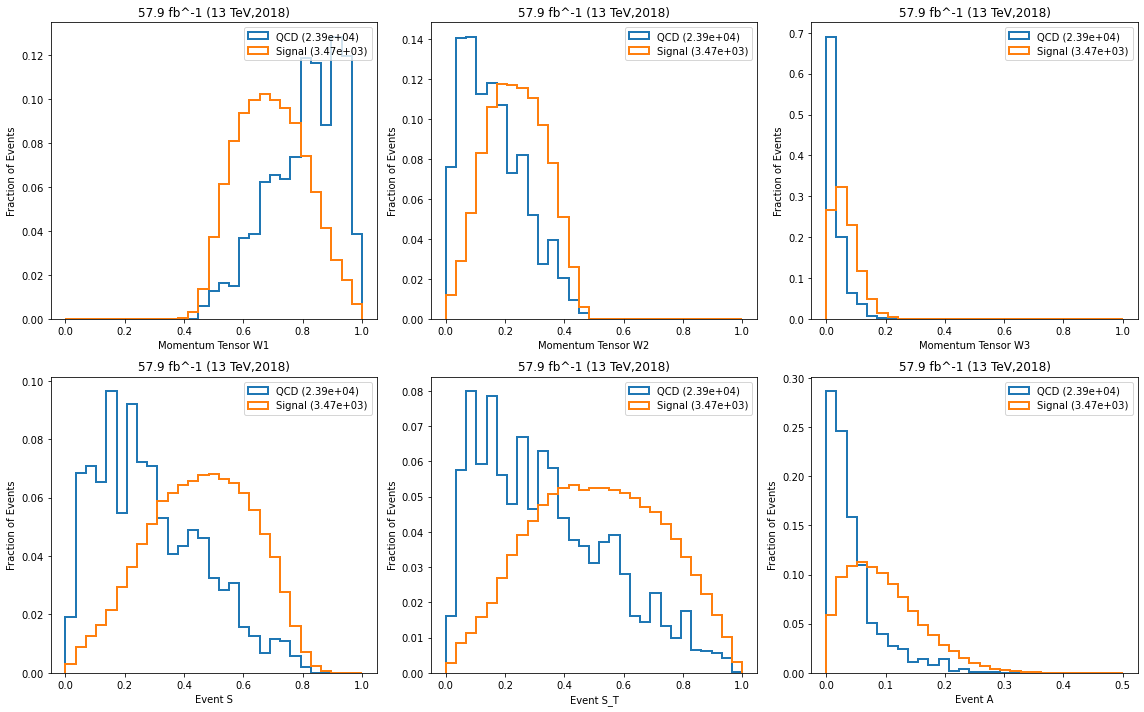

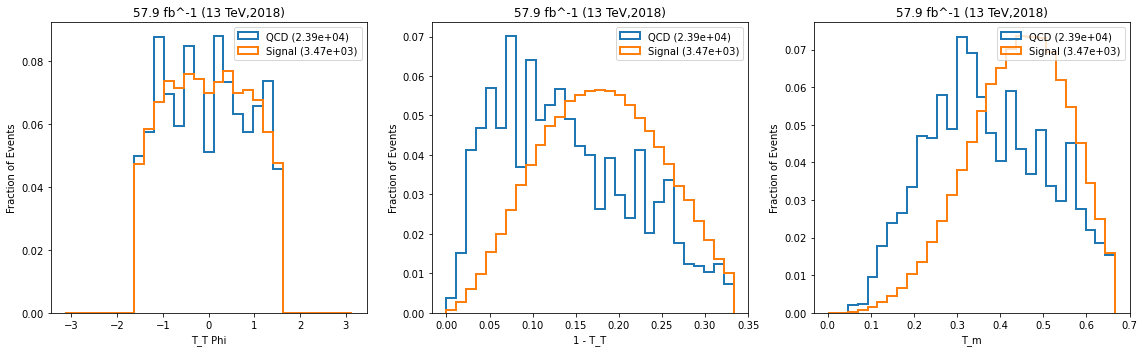

In [15]:
study.jet_sphericity(qcd_tree,signal_tree,saveas="selected_qcd_vs_signal")
study.jet_thrust(qcd_tree,signal_tree,saveas="selected_qcd_vs_signal")

In [8]:
def minmax_display(tree,key,useabs=False,printout=[],tag=None):
    value = tree[key]
    if useabs: value = np.abs(value)
    imin,imax = ak.argmin(value),ak.argmax(value)
    tree.tag = tag
    print(f"--Minimum {key}--")
    study.jet_display(tree,ie=imin,printout=printout,boosted=1,saveas=f"{tag}_min_{key}")
    print(f"--Maximum {key}--")
    study.jet_display(tree,ie=imax,printout=printout,boosted=1,saveas=f"{tag}_max_{key}")

--Minimum event_St--
event_S: 0.0010848855428682834
event_St: 0.0009499824366668383
M_eig_w1: 0.9992767429714211
M_eig_w2: 0.00047487323821421957
M_eig_w3: 0.00024838379036463596
thrust_phi: 1.05834299843535
n_jet: 6


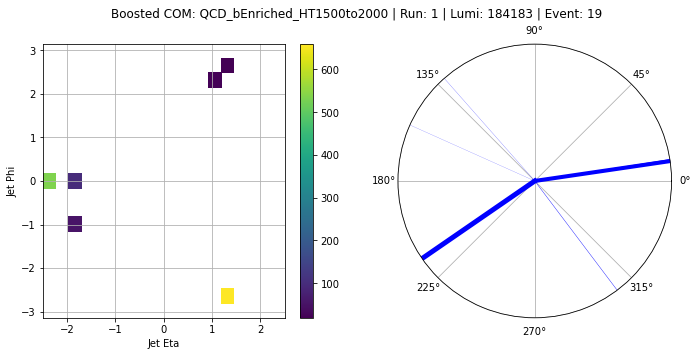

--Maximum event_St--
event_S: 0.7655773847339428
event_St: 0.9864756283539788
M_eig_w1: 0.4896150768440382
M_eig_w2: 0.4765483239410371
M_eig_w3: 0.033836599214924774
thrust_phi: -0.5999908074321634
n_jet: 6


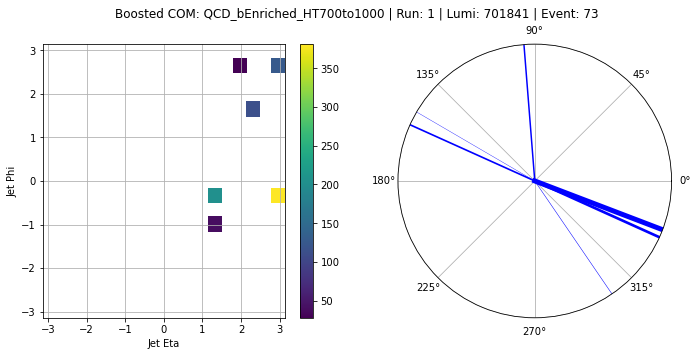

--Minimum event_St--
event_S: 0.007436448358707046
event_St: 0.008235882378114694
M_eig_w1: 0.995042367760862
M_eig_w2: 0.004114469092807979
M_eig_w3: 0.0008431631463300513
thrust_phi: 0.34225666672651855
n_jet: 6


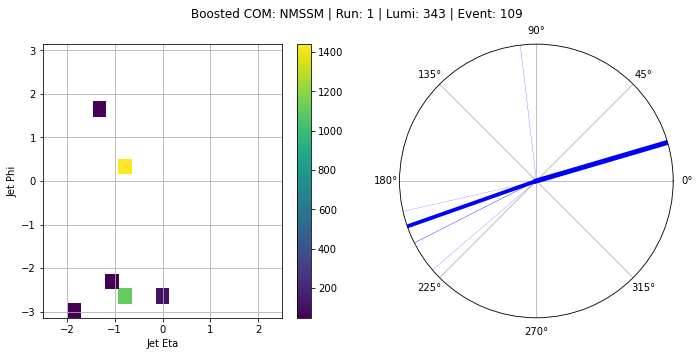

--Maximum event_St--
event_S: 0.8475579796205837
event_St: 0.9993138892626415
M_eig_w1: 0.43496134691961097
M_eig_w2: 0.43436489285223606
M_eig_w3: 0.13067376022815308
thrust_phi: -0.3835862580067242
n_jet: 7


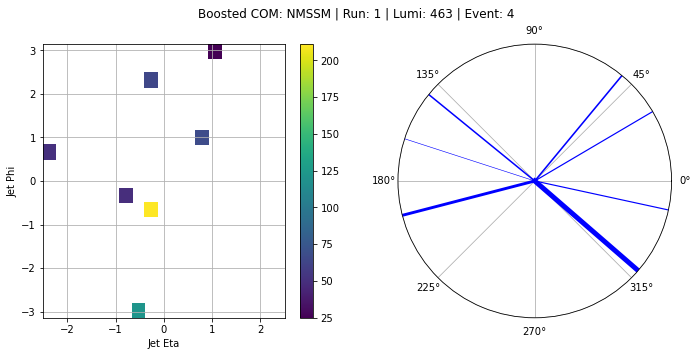

In [11]:
printout=["event_S","event_St","M_eig_w1","M_eig_w2","M_eig_w3","thrust_phi","n_jet"]
minmax_display(qcd_tree,"event_St",useabs=1,printout=printout,tag="qcd")
minmax_display(signal_tree,"event_St",useabs=1,printout=printout,tag="signal")